# Linear Models - Regression

##  [Ordinary Least Squares](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)

In [1]:
from sklearn import linear_model
from sklearn import datasets
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = datasets.fetch_california_housing()

In [3]:
print(type(data))
print(data.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['target', 'DESCR', 'data', 'feature_names'])


In [4]:
print(type(data.data))
print(type(data.feature_names))
print(type(data.DESCR))
print(type(data.target))

<class 'numpy.ndarray'>
<class 'list'>
<class 'str'>
<class 'numpy.ndarray'>


In [5]:
print(data.data)
print(data.feature_names)
print(data.DESCR)
print(data.target)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median hous

In [6]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [9]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
target        20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
print(df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


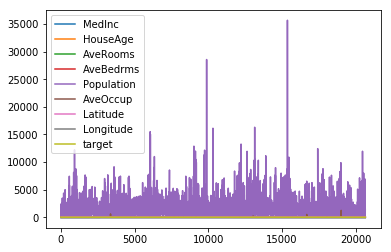

In [12]:
df.plot()

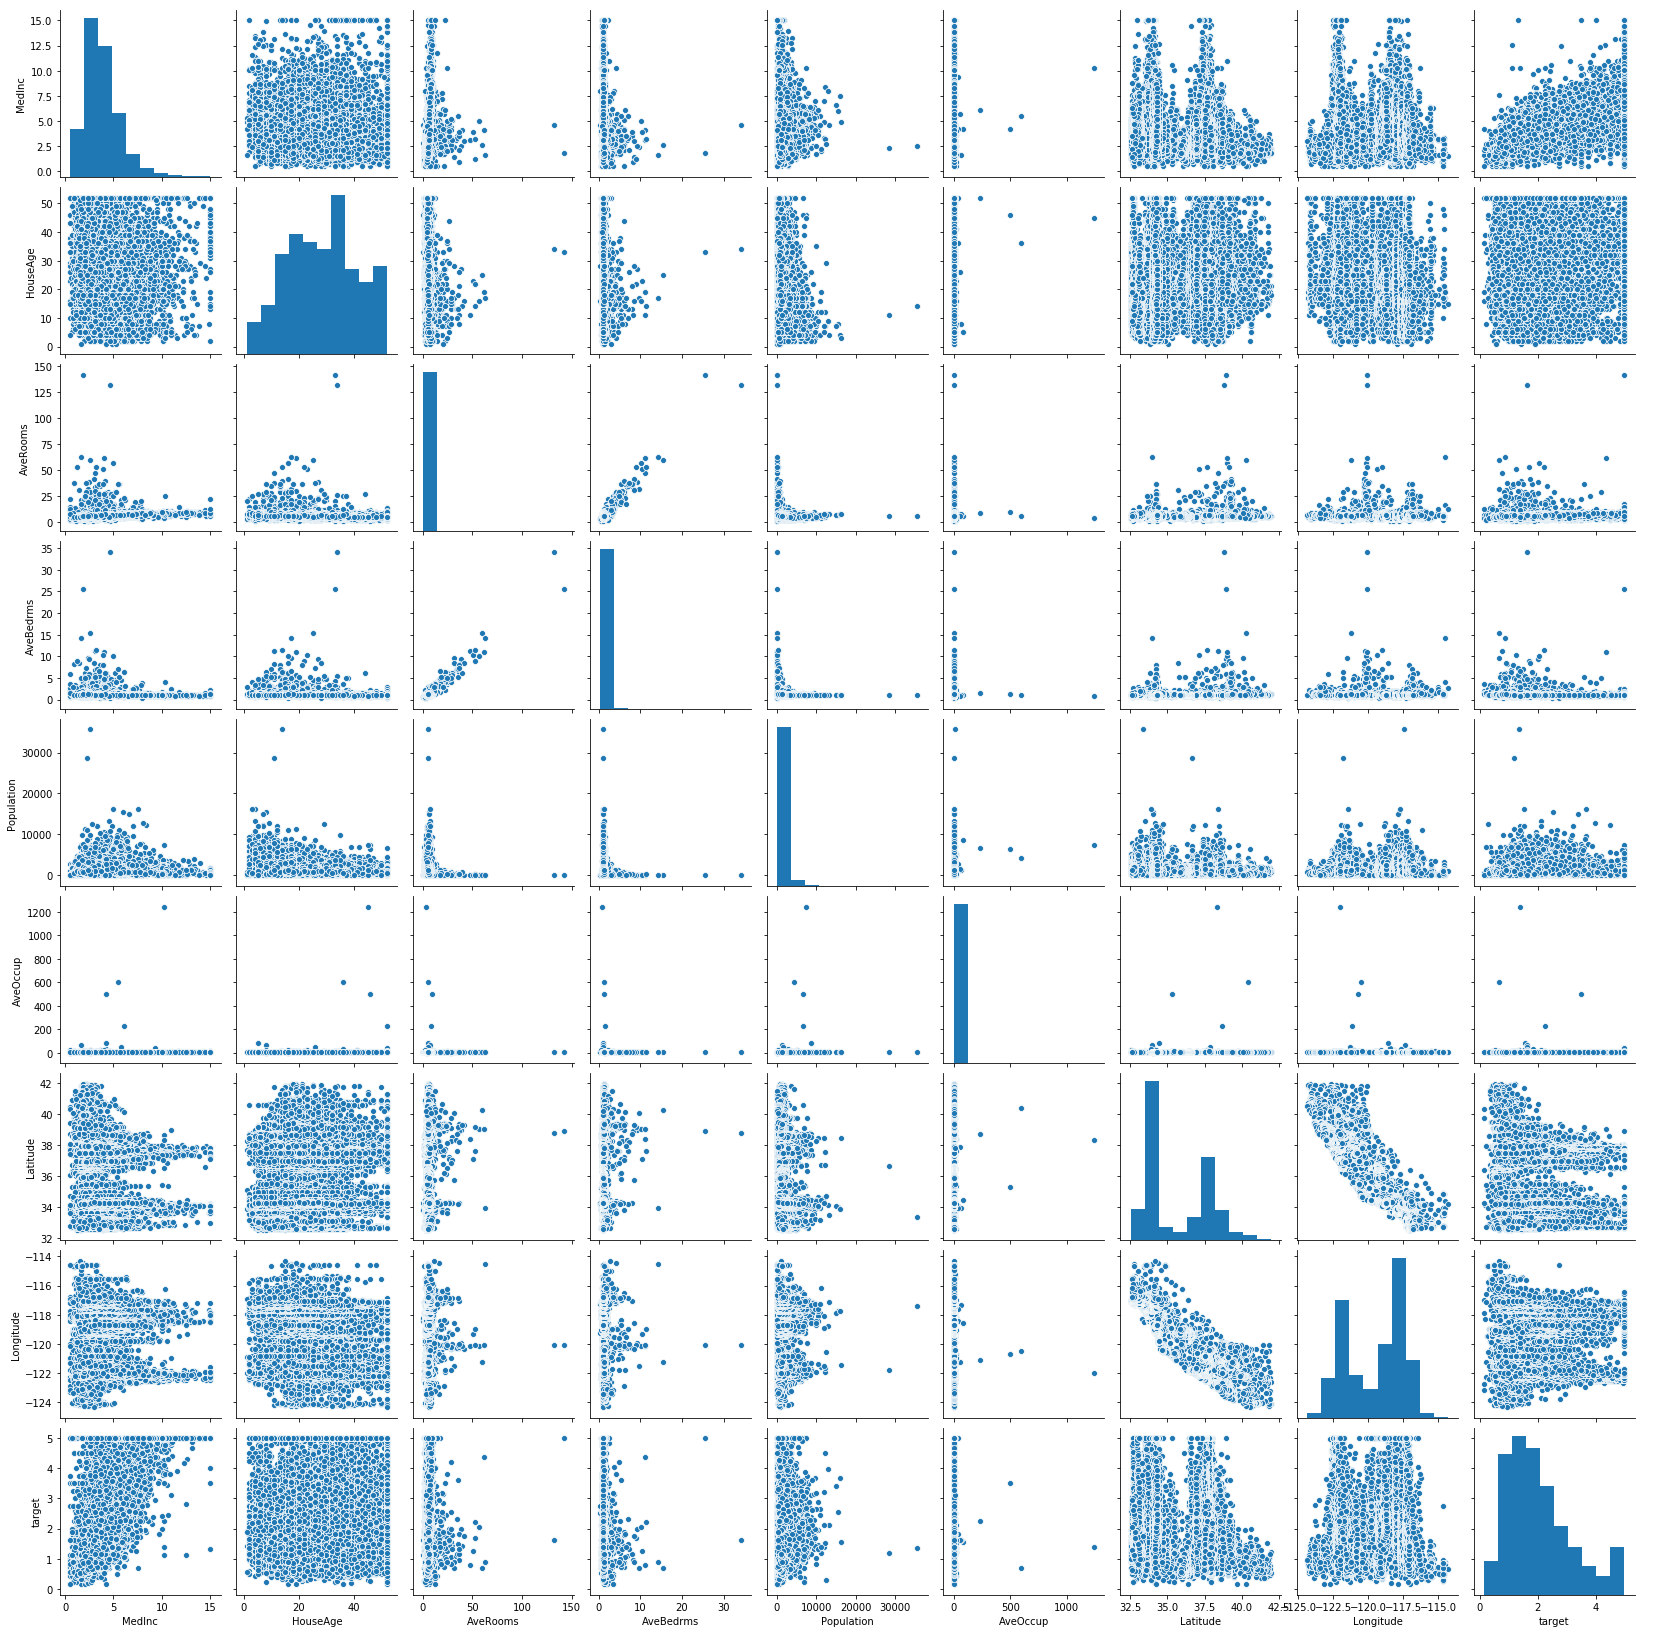

In [13]:
sns.pairplot(df)

In [14]:
X_train = data.data
y_train = data.target

In [15]:
print(X_train[:5])

[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]


In [16]:
print(y_train[:5])

[4.526 3.585 3.521 3.413 3.422]


In [17]:
# y = wx + b
model = linear_model.LinearRegression()

In [18]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print(model.coef_) # 기울기, w1, w2 ... wn

[ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


In [20]:
print('used features: {}'.format(np.sum(model.coef_ != 0)))

used features: 8


In [21]:
print(model.score(X_train, y_train)) # 0~1

0.6062326851998049


In [22]:
print(model.intercept_) # 절편, b

-36.94192020718436


In [23]:
df.drop(columns=['target'], inplace=True)

In [24]:
X_train = np.array(df)
y_train = data.target

In [25]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print(model.coef_)

[ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


In [27]:
X_train = df[['MedInc']].values
y_train = data.target

In [28]:
print(type(X_train))

<class 'numpy.ndarray'>


In [29]:
X_train.shape

(20640, 1)

In [30]:
print(X_train[-5:])

[[1.5603]
 [2.5568]
 [1.7   ]
 [1.8672]
 [2.3886]]


In [31]:
print(y_train[-5:])

[0.781 0.771 0.923 0.847 0.894]


In [32]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
print(model.score(X_train, y_train))

0.473447491807199


In [34]:
print(model.coef_)

[0.41793849]


In [35]:
print(model.intercept_)

0.4508557670326787


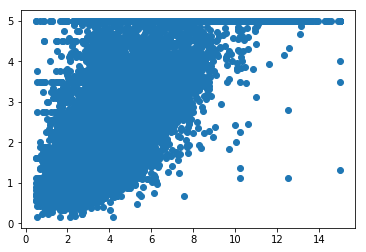

In [36]:
plt.scatter(X_train, y_train)

In [37]:
y = model.predict(X_train)

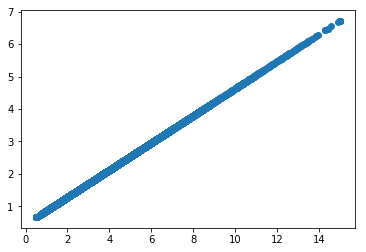

In [38]:
plt.scatter(X_train, y)

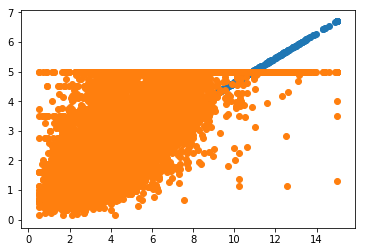

In [39]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

##  [Ridge regression](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification)

In [40]:
from sklearn import linear_model
from sklearn import datasets
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [41]:
data = datasets.fetch_california_housing()

In [42]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)

In [43]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [44]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [45]:
X_train = df[['MedInc']].values
y_train = data.target

In [46]:
# LInearRegression과 비슷하나 overfit이 덜 된다

model = linear_model.Ridge(alpha=0.5)

In [47]:
model.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [48]:
print(model.score(X_train, y_train))

0.47344749178586965


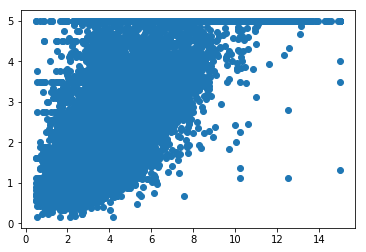

In [49]:
plt.scatter(X_train, y_train)

In [50]:
y = model.predict(X_train)

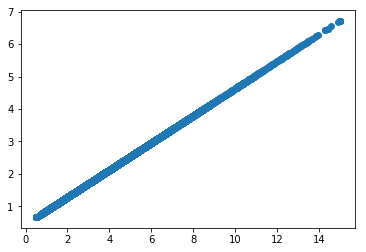

In [51]:
plt.scatter(X_train, y)

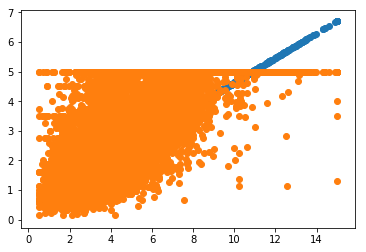

In [52]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

## [Lasso](https://scikit-learn.org/stable/modules/linear_model.html#lasso)

In [53]:
X_train = df[['MedInc']].values
y_train = data.target

In [54]:
model = linear_model.Lasso(alpha=0.1)

In [55]:
model.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [56]:
y = model.predict(X_train)

In [57]:
print(model.score(X_train, y_train))

0.47136665620888873


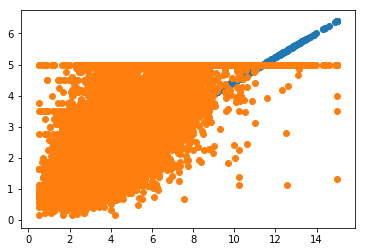

In [58]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

## [Multi-mask Lasso](https://scikit-learn.org/stable/modules/linear_model.html#multi-task-lasso)

## [Elastic-Net](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net)

In [59]:
X_train = df[['MedInc']].values
y_train = data.target

In [60]:
model = linear_model.ElasticNet()

In [61]:
model.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [62]:
y = model.predict(X_train)

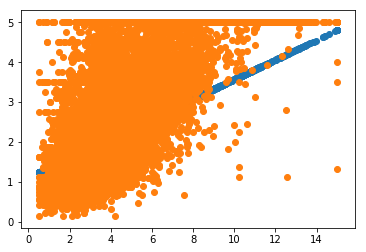

In [63]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

## [Multi-task Elastic-Net](https://scikit-learn.org/stable/modules/linear_model.html#multi-task-elastic-net)

## [Least Angle Regression](https://scikit-learn.org/stable/modules/linear_model.html#least-angle-regression)

In [64]:
X_train = df[['MedInc']].as_matrix()
y_train = data.target

In [65]:
model = linear_model.Lars(n_nonzero_coefs=1)

In [66]:
model.fit(X_train, y_train)

Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True, fit_path=True,
     n_nonzero_coefs=1, normalize=True, precompute='auto', verbose=False)

In [67]:
y = model.predict(X_train)

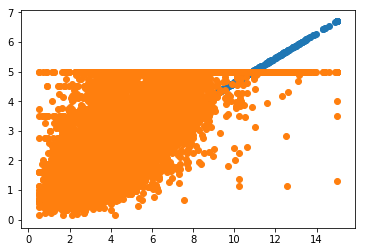

In [68]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

## [LARS Lasso](https://scikit-learn.org/stable/modules/linear_model.html#lars-lasso)

In [69]:
X_train = df[['MedInc']].as_matrix()
y_train = data.target

In [70]:
model = linear_model.LassoLars(alpha=0.1)

In [71]:
model.fit(X_train, y_train)

LassoLars(alpha=0.1, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute='auto', verbose=False)

In [72]:
y = model.predict(X_train)

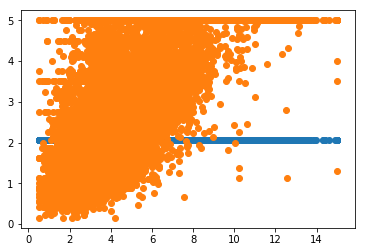

In [73]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

## [Orthogonal Matching Pursuit](https://scikit-learn.org/stable/modules/linear_model.html#orthogonal-matching-pursuit-omp)

In [74]:
X_train = df[['MedInc']].as_matrix()
y_train = data.target

In [75]:
model = linear_model.OrthogonalMatchingPursuit()

In [76]:
model.fit(X_train, y_train)

OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)

In [77]:
y = model.predict(X_train)

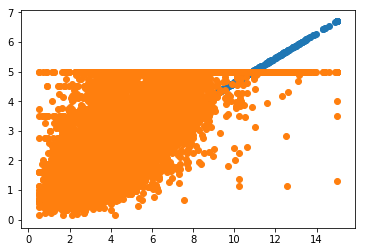

In [78]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

## [Bayesian Regression](https://scikit-learn.org/stable/modules/linear_model.html#bayesian-regression)

In [79]:
X_train = df[['MedInc']].as_matrix()
y_train = data.target

In [80]:
model = linear_model.BayesianRidge()

In [81]:
model.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [82]:
y = model.predict(X_train)

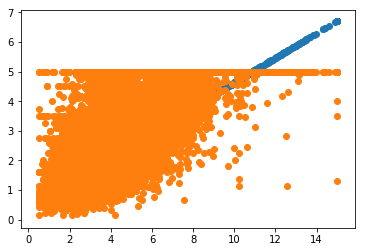

In [83]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

In [84]:
# need to watch the log and python code
#X_train = df[['MedInc']].as_matrix()
#y_train = data.target

In [85]:
#model = linear_model.ARDRegression()

In [86]:
#model.fit(X_train, y_train)

In [87]:
#y = model.predict(X_train)

In [88]:
#plt.scatter(X_train, y)
#plt.scatter(X_train, y_train)
#plt.show()

## [ Stochastic Gradient Descent](https://scikit-learn.org/stable/modules/linear_model.html#stochastic-gradient-descent-sgd)

In [89]:
X_train = df[['MedInc']].as_matrix()
y_train = data.target

In [90]:
model = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)

In [91]:
model.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [92]:
y = model.predict(X_train)

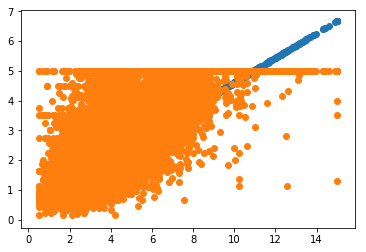

In [93]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

## [Perceptron](https://scikit-learn.org/stable/modules/linear_model.html#perceptron)

In [94]:
X_train = df[['MedInc']].as_matrix()
y_train = data.target

In [95]:
model = linear_model.PassiveAggressiveRegressor(max_iter=100, random_state=0, tol=1e-3)

In [96]:
model.fit(X_train, y_train)

PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                           epsilon=0.1, fit_intercept=True,
                           loss='epsilon_insensitive', max_iter=100,
                           n_iter_no_change=5, random_state=0, shuffle=True,
                           tol=0.001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [97]:
y = model.predict(X_train)

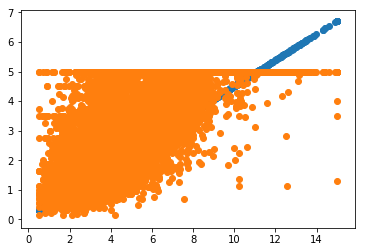

In [98]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

## [Robustness regression](https://scikit-learn.org/stable/modules/linear_model.html#robustness-regression-outliers-and-modeling-errors)

In [99]:
X_train = df[['MedInc']].as_matrix()
y_train = data.target

In [100]:
model = linear_model.RANSACRegressor()

In [101]:
model.fit(X_train, y_train)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [102]:
y = model.predict(X_train)

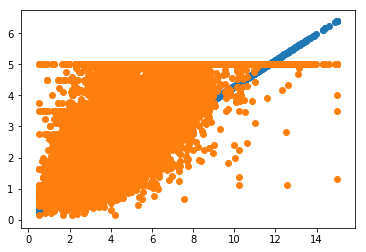

In [103]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

In [104]:
model = linear_model.TheilSenRegressor(random_state=42)

In [105]:
model.fit(X_train, y_train)

TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
                  max_subpopulation=10000, n_jobs=None, n_subsamples=None,
                  random_state=42, tol=0.001, verbose=False)

In [106]:
y = model.predict(X_train)

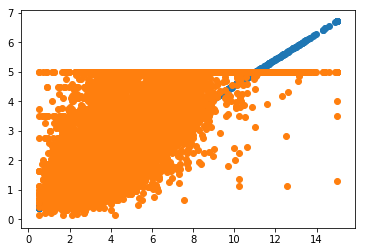

In [107]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

In [108]:
model = linear_model.HuberRegressor()

In [109]:
model.fit(X_train, y_train)

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)

In [110]:
y = model.predict(X_train)

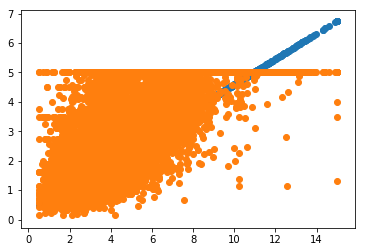

In [111]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

## [Polynomial regression](https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)